In [2]:
import os
from glob import glob

import gurobi_logtools as glt
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolatefrom scipy import interpolate

In [ ]:
def get_x_y(log_dir):
    files_path = glob(f"{log_dir}/*")
    ys = []

    for file in files_path:
        results = glt.parse(file)
        nodelog_progress = results.progress("nodelog")
        x = nodelog_progress["Time"] - nodelog_progress["Time"].min() + 1
        y = nodelog_progress["Incumbent"]
        f_linear = interpolate.interp1d(x, y, kind="linear")
        ynew = f_linear(xnew)
        ys.append(list(ynew))
    return np.array(ys).mean(axis=0)

In [152]:
TaskName = "CJ"
solver = "GRB"
base_dir = f"/mnt/disk1/thlee/MILP/pas/test_logs/{TaskName}/{solver}"

params = os.listdir(base_dir)
datatypes = ["train", "val"]
ys_dict = {}

In [164]:
for par in params:
    ys_dict[par] = {}
    for d_type in datatypes:
        dir_path = os.path.join(base_dir, par, d_type)
        ys_dict[par][d_type] = get_x_y(dir_path)

In [133]:
gurobi_train_path = "/mnt/disk1/thlee/MILP/pas/dataset/CJ/train/logs"
gurobi_val_path = "/mnt/disk1/thlee/MILP/pas/dataset/CJ/val/logs"
xnew = np.arange(1, 600, 1)

In [167]:
train_y = get_x_y(gurobi_train_path)
val_y = get_x_y(gurobi_val_path)
y = {}
y["train"] = train_y
y["val"] = val_y

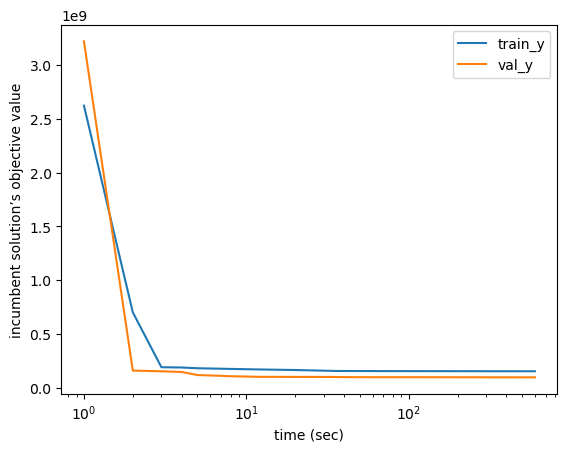

In [166]:
plt.plot(xnew, train_y, "-", label="train_y")
plt.plot(xnew, val_y, "-", label="val_y")
plt.xscale("log")
plt.xlabel("time (sec)")
plt.ylabel("Incumbent solution’s objective value")
plt.legend()
plt.show()

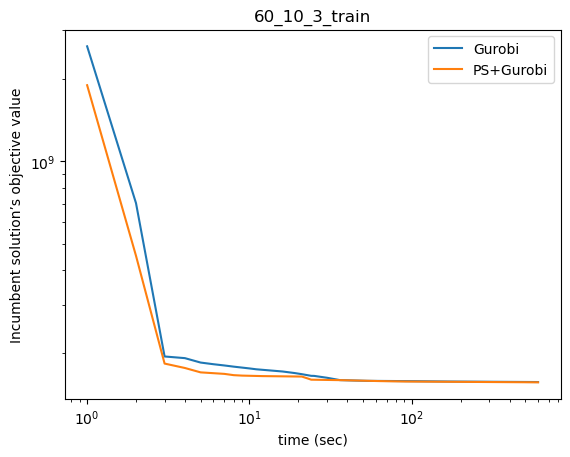

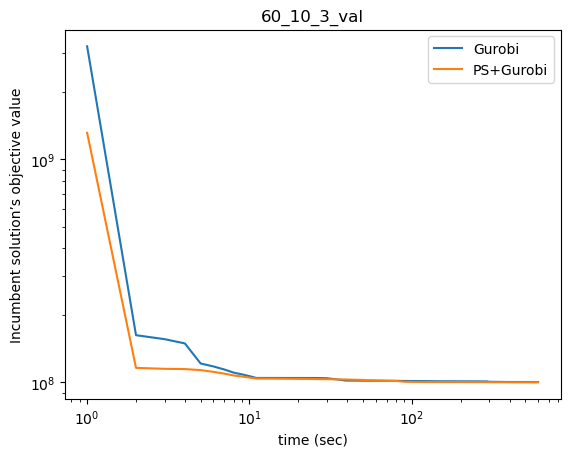

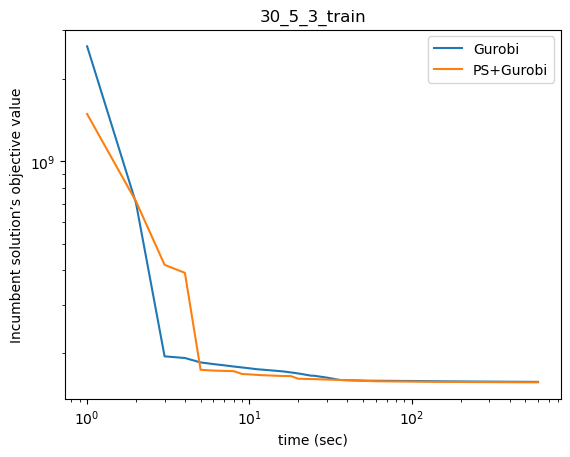

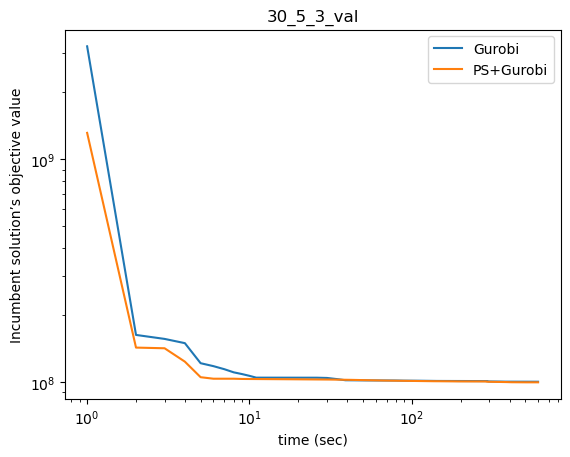

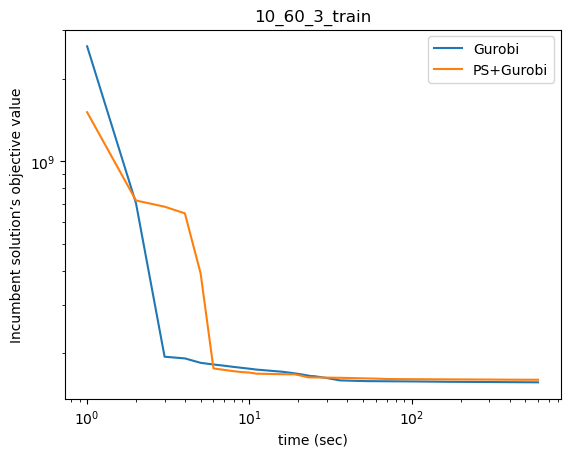

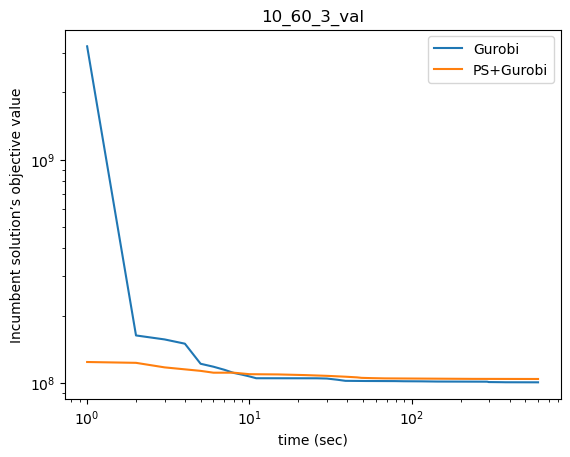

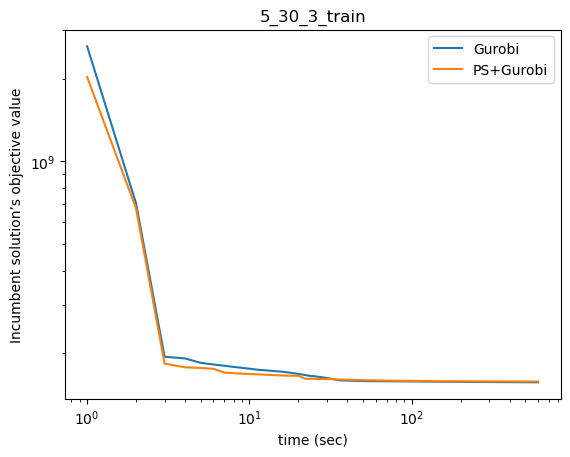

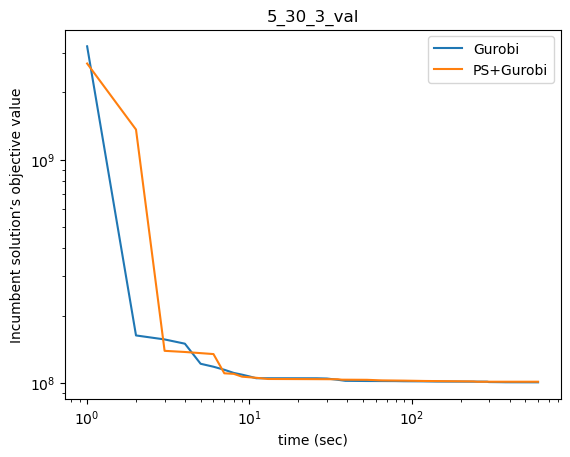

In [170]:
for par in params:
    for d_type in datatypes:
        plt.plot(xnew, y[d_type], "-", label="Gurobi")
        plt.plot(xnew, ys_dict[par][d_type], "-", label="PS+Gurobi")
        plt.xscale("log")
        plt.yscale("log")
        plt.xlabel("time (sec)")
        plt.ylabel("Incumbent solution’s objective value")
        plt.title(f"{par}_{d_type}")
        plt.legend()
        plt.show()

# histogram of each variable's value

In [1]:
import io
import os
import pickle
from glob import glob

import gurobipy as gp
import numpy as np
import torchimport torch

In [2]:
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == "torch.storage" and name == "_load_from_bytes":
            return lambda b: torch.load(io.BytesIO(b), map_location="cpu")
        else:
            return super().find_class(module, name)

In [3]:
TaskName = "CJ/new"
ins_dir = f"/mnt/disk1/thlee/MILP/pas/instance/{TaskName}/train"
sol_dir = f"/mnt/disk1/thlee/MILP/pas/dataset/{TaskName}/train/solution"
bg_dir = f"/mnt/disk1/thlee/MILP/pas/dataset/{TaskName}/train/BG"

ins_names = sorted(os.listdir(ins_dir))
# sols_path = sorted(glob(f"{sol_dir}/*"))
# bgs_path = sorted(glob(f"{bg_dir}/*"))

In [5]:
for ins_name in ins_names:
    sol_path = f"{sol_dir}/{ins_name}.sol"
    # bg_path = f"{bg_dir}/{ins_name}.bg"

    with open(sol_path, "rb") as f:
        solData = pickle.load(f)
    # with open(bg_path, "rb") as f:
    #     bgData = CPU_Unpickler(f).load()
    # A, v_map, v_nodes, c_nodes, b_vars = bgData
    m = gp.read(f"{ins_dir}/{ins_name}")
    mvars = m.getVars()
    i_vars = [i.VarName for i in mvars if i.VType == "I"]
    break

Set parameter Username
Academic license - for non-commercial use only - expires 2025-06-20
Read MPS format model from file /mnt/disk1/thlee/MILP/pas/instance/CJ/new/train/S000.mps.gz
Reading time = 1.19 seconds
(null): 199866 rows, 124072 columns, 746370 nonzeros


In [7]:
v_map = {var_name: i for i, var_name in enumerate(solData["var_names"])}

In [8]:
var_idx = v_map[i_vars[1]]

In [19]:
var_idx += 1
solData["sols"][:, var_idx]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
      dtype=float32)

In [306]:
solData["sols"].shape

(65, 124072)

In [310]:
i_idxs = np.array([v_map[i] for i in i_vars])

In [327]:
x, y = np.unique(solData["sols"][:, i_idxs], return_counts=True)

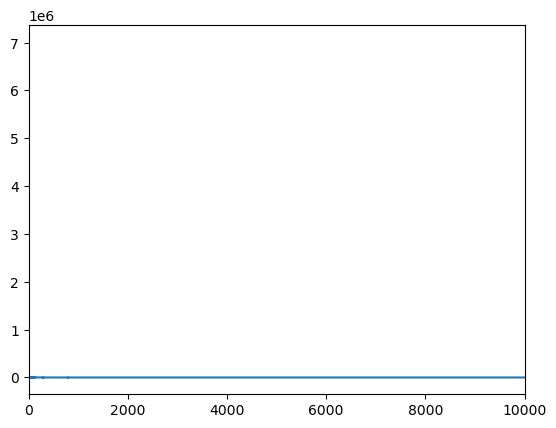

<Figure size 640x480 with 0 Axes>

In [345]:
plt.plot(x, y, "-", label="Gurobi")
# plt.xscale("log")
# plt.yscale("log")
# plt.xlabel("time (sec)")
# plt.ylabel("Incumbent solution’s objective value")
# plt.title(f"{par}_{d_type}")
# plt.legend()
plt.xlim([0, 10000])
plt.show()
plt.clf()

# Statistics of coefficient

In [1]:
import io
import os
import pickle
from glob import glob

import gurobipy as gp
import numpy as np
import torch

In [2]:
TaskName = "CJ/new"
ins_dir = f"/mnt/disk1/thlee/MILP/pas/instance/{TaskName}/train"
sol_dir = f"/mnt/disk1/thlee/MILP/pas/dataset/{TaskName}/train/solution"
bg_dir = f"/mnt/disk1/thlee/MILP/pas/dataset/{TaskName}/train/BG"

ins_names = sorted(os.listdir(ins_dir))
# sols_path = sorted(glob(f"{sol_dir}/*"))
# bgs_path = sorted(glob(f"{bg_dir}/*"))

In [26]:
rate_list, max_list, min_list, mean_list, std_list = [], [], [], [], []
for ins_name in ins_names:
    ins_path = f"{ins_dir}/{ins_name}"
    m = gp.read(ins_path)

    c_matrix = m.getA()
    sense = np.array(m.getAttr("Sense", m.getConstrs()))
    rhs = np.array(m.getAttr("RHS", m.getConstrs()))

    index_ge = np.where(sense == ">")[0]
    c_matrix[index_ge] *= -1
    rhs[index_ge] *= -1

    rate_ = (c_matrix.sum(axis=0) == 0).sum() / c_matrix.shape[1]

    rate_list.append(rate_ * 100)
    max_list.append(c_matrix.max())
    min_list.append(c_matrix.min())

    mean_list.append(c_matrix[(c_matrix != 0)].mean())
    std_list.append(c_matrix[(c_matrix != 0)].std())
    print(f"{ins_name} rate: {rate_ * 100}")

Read MPS format model from file /mnt/disk1/thlee/MILP/pas/instance/CJ/new/train/S000.mps.gz
Reading time = 0.35 seconds
(null): 199866 rows, 124072 columns, 746370 nonzeros
S000.mps.gz rate: 0.9333290347540139
Read MPS format model from file /mnt/disk1/thlee/MILP/pas/instance/CJ/new/train/S001.mps.gz
Reading time = 0.32 seconds
(null): 199818 rows, 127207 columns, 761519 nonzeros
S001.mps.gz rate: 0.9142578631679074
Read MPS format model from file /mnt/disk1/thlee/MILP/pas/instance/CJ/new/train/S002.mps.gz
Reading time = 0.33 seconds
(null): 199865 rows, 139089 columns, 842959 nonzeros
S002.mps.gz rate: 0.842625944539108
Read MPS format model from file /mnt/disk1/thlee/MILP/pas/instance/CJ/new/train/S003.mps.gz
Reading time = 0.31 seconds
(null): 199816 rows, 120949 columns, 726847 nonzeros
S003.mps.gz rate: 0.9698302590347998
Read MPS format model from file /mnt/disk1/thlee/MILP/pas/instance/CJ/new/train/S004.mps.gz
Reading time = 0.32 seconds
(null): 199763 rows, 130275 columns, 7818

In [27]:
print(np.mean(rate_list))
print(np.mean(max_list))
print(np.mean(min_list))
print(np.mean(mean_list))
print(np.mean(std_list))
print("good")

0.90499640654145
7000.0
-1500000.0
-112.49671139797978
4179.621046868429
good


In [5]:
a = np.array(c_matrix[(c_matrix != 0)]).flatten()

In [20]:
a[a > 0].mean()

8.716674272350014

In [1]:
a[a < 0].mean()

NameError: name 'a' is not defined

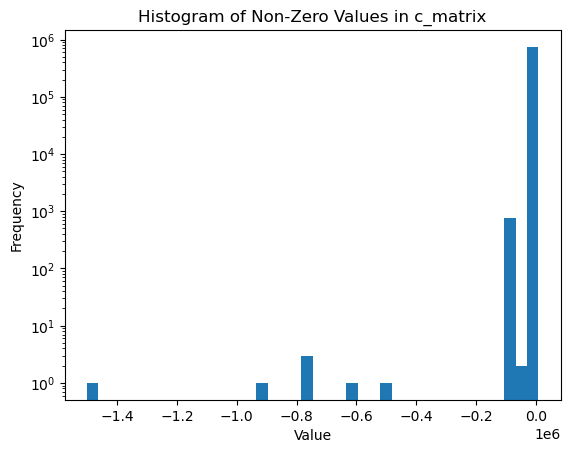

In [16]:
import matplotlib.pyplot as plt

# Get the non-zero values from c_matrix
non_zero_values = np.array(c_matrix[(c_matrix != 0)]).flatten()

# Create the histogram
plt.hist(non_zero_values, bins=40)

# Set the labels and title
plt.xlabel("Value")
plt.yscale("log")
plt.ylabel("Frequency")
plt.title("Histogram of Non-Zero Values in c_matrix")

# Show the histogram
plt.show()

In [72]:
Aeq = c_matrix[sense == "=", :]
Ale = c_matrix[sense == "<", :]
Age = c_matrix[sense == ">", :]

In [55]:
Aeq.shape

(170614, 124072)

In [56]:
Ale.shape

(25880, 124072)

In [73]:
Age.shape

(3372, 124072)

(199866,)